In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("energydata_complete.csv")

In [2]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
data.columns[1:]

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[1:]].values.reshape(-1,28)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [7]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

15788 1973 1974


In [8]:
test

array([[0.05607476, 0.        , 0.8775079 , ..., 0.6161388 , 0.05636808,
        0.05636808],
       [0.04672897, 0.        , 0.8669481 , ..., 0.61236805, 0.9509427 ,
        0.9509427 ],
       [0.04672897, 0.        , 0.8669481 , ..., 0.6085973 , 0.48091778,
        0.48091778],
       ...,
       [0.24299064, 0.14285715, 0.91974664, ..., 0.89894426, 0.58397865,
        0.58397865],
       [0.38317758, 0.14285715, 0.91974664, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.39252338, 0.14285715, 0.91974664, ..., 0.89592767, 0.6823906 ,
        0.6823906 ]], dtype=float32)

In [16]:
test[0:12,0].shape

(12,)

In [14]:
test[1,0]

0.046728972

In [8]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [17]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back: i+ look_back+predict, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [126]:
look_back = 72
predict=18
trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back, predict)


15698
1883
1884


In [127]:
print(trainX.shape)
print(trainY.shape)

(15698, 72, 28)
(15698, 18)


In [128]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [129]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [130]:
print(trainX.shape)
print(trainY.shape)

(15698, 1, 72, 28)
(15698, 18, 1)


In [143]:
from tensorflow.keras.models import *

first_input = Input(shape=(None,72,28))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
in1=Dropout(0.3)(in1)

#model.add(LSTM(units = 128, return_sequences=True))
in1=LSTM(units =100 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
out1=Dense(18, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/appliance_conv1d_timedist_5_3_1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 15698 samples, validate on 1883 samples
Epoch 1/200
15300/15698 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00001: val_loss improved from inf to 0.00549, saving model to saved_weights/appliance_conv1d_timedist_5_3_1.hdf5
15698/15698 [==============================] - 4s 233us/sample - loss: 0.0097 - val_loss: 0.0055
Epoch 2/200
15400/15698 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00002: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 127us/sample - loss: 0.0083 - val_loss: 0.0068
Epoch 3/200
15400/15698 [============================>.] - ETA: 0s - loss: 0.0075
Epoch 00003: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 128us/sample - loss: 0.0075 - val_loss: 0.0091
Epoch 4/200
15200/15698 [============================>.] - ETA: 0s - loss: 0.0067
Epoch 00004: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 128us/samp

Epoch 36/200
15500/15698 [============================>.] - ETA: 0s - loss: 0.0019
Epoch 00036: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 135us/sample - loss: 0.0019 - val_loss: 0.0070
Epoch 37/200
15300/15698 [============================>.] - ETA: 0s - loss: 0.0019
Epoch 00037: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 129us/sample - loss: 0.0018 - val_loss: 0.0072
Epoch 38/200
15600/15698 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 00038: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 124us/sample - loss: 0.0018 - val_loss: 0.0070
Epoch 39/200
15400/15698 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 00039: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 124us/sample - loss: 0.0018 - val_loss: 0.0067
Epoch 40/200
15500/15698 [============================>.] - ETA: 0s - loss: 

Epoch 72/200
15500/15698 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00072: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 0.0011 - val_loss: 0.0066
Epoch 73/200
15500/15698 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 00073: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 0.0012 - val_loss: 0.0070
Epoch 74/200
15500/15698 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00074: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 0.0011 - val_loss: 0.0066
Epoch 75/200
15600/15698 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00075: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 0.0011 - val_loss: 0.0067
Epoch 76/200
15400/15698 [============================>.] - ETA: 0s - loss: 

Epoch 107/200
15600/15698 [============================>.] - ETA: 0s - loss: 9.3311e-04
Epoch 00107: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 9.3332e-04 - val_loss: 0.0072
Epoch 108/200
15500/15698 [============================>.] - ETA: 0s - loss: 9.1315e-04
Epoch 00108: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 9.1216e-04 - val_loss: 0.0071
Epoch 109/200
15600/15698 [============================>.] - ETA: 0s - loss: 9.0387e-04
Epoch 00109: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 9.0198e-04 - val_loss: 0.0072
Epoch 110/200
15600/15698 [============================>.] - ETA: 0s - loss: 8.9075e-04
Epoch 00110: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 8.9070e-04 - val_loss: 0.0076
Epoch 111/200
15600/15698 [=============

15600/15698 [============================>.] - ETA: 0s - loss: 7.9657e-04
Epoch 00141: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 7.9825e-04 - val_loss: 0.0078
Epoch 142/200
15500/15698 [============================>.] - ETA: 0s - loss: 7.9677e-04
Epoch 00142: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 124us/sample - loss: 7.9560e-04 - val_loss: 0.0079
Epoch 143/200
15600/15698 [============================>.] - ETA: 0s - loss: 7.8702e-04
Epoch 00143: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 7.8664e-04 - val_loss: 0.0075
Epoch 144/200
15600/15698 [============================>.] - ETA: 0s - loss: 7.7387e-04
Epoch 00144: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 7.7329e-04 - val_loss: 0.0075
Epoch 145/200
15600/15698 [===========================

15600/15698 [============================>.] - ETA: 0s - loss: 7.0564e-04
Epoch 00175: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 7.0601e-04 - val_loss: 0.0086
Epoch 176/200
15600/15698 [============================>.] - ETA: 0s - loss: 6.9652e-04
Epoch 00176: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 6.9802e-04 - val_loss: 0.0072
Epoch 177/200
15600/15698 [============================>.] - ETA: 0s - loss: 6.9830e-04
Epoch 00177: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 6.9913e-04 - val_loss: 0.0084
Epoch 178/200
15600/15698 [============================>.] - ETA: 0s - loss: 6.8415e-04
Epoch 00178: val_loss did not improve from 0.00549
15698/15698 [==============================] - 2s 123us/sample - loss: 6.8335e-04 - val_loss: 0.0081
Epoch 179/200
15600/15698 [===========================

In [135]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None, 72, 28)]    0         
_________________________________________________________________
time_distributed_51 (TimeDis (None, None, 68, 64)      9024      
_________________________________________________________________
time_distributed_52 (TimeDis (None, None, 66, 64)      12352     
_________________________________________________________________
time_distributed_53 (TimeDis (None, None, 66, 64)      4160      
_________________________________________________________________
time_distributed_54 (TimeDis (None, None, 33, 64)      0         
_________________________________________________________________
time_distributed_55 (TimeDis (None, None, 2112)        0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               8852

In [136]:
model.load_weights("saved_weights/appliance_conv1d_timedist_5_3_1.hdf5")

In [137]:
yhat = model.predict([testX])
yhat.shape

(1884, 18)

In [107]:
yhat[1]

array([0.05906447, 0.07618675, 0.06962619, 0.09097206, 0.10198675,
       0.08587529, 0.076983  , 0.08004813, 0.07747807, 0.07846327,
       0.07762454, 0.0721241 ], dtype=float32)

In [116]:
testY.shape

(1902, 12, 1)

In [104]:
yhat[1].shape

()

In [117]:
testY[2].shape

(12, 1)

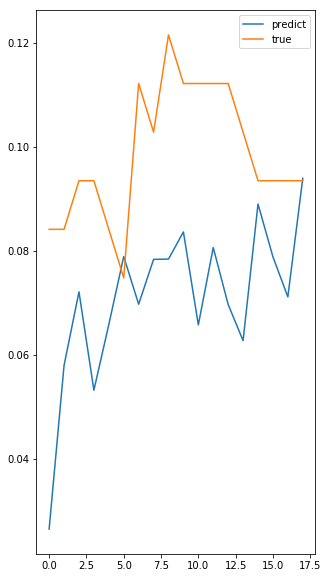

Test RMSE: 0.03232
Test MAE: 0.02827
Test MSE: 0.00104
Test RMSE: 35.12053
Test MAE: 30.71789


In [141]:
#1dcnn(5,1)

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(5,10))
yhat=yhat[4]
testy=testY[4]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [135]:
trainX.shape

(15728, 60, 28)

In [137]:
first_input = Input(shape=(60,28))

in1=Bidirectional(LSTM(150))(first_input)
in1=Dense(1,activation='tanh')(in1)
model=Model(first_input,in1)
model.compile(optimizer='adam', loss='mse')
model.summary()
checkpoint_path = "saved_weights/appliance_timebilstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=200, verbose=1,callbacks=[cb])

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 60, 28)]          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               214800    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 301       
Total params: 215,101
Trainable params: 215,101
Non-trainable params: 0
_________________________________________________________________
Train on 15728 samples, validate on 1913 samples
Epoch 1/200
15712/15728 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00001: val_loss improved from inf to 0.00773, saving model to saved_weights/appliance_timebilstm.hdf5
15728/15728 [==============================] - 17s 1ms/sample - loss: 0.0078 - val_loss: 0.0077
Epoch 2/200
15712/15728 [======================

KeyboardInterrupt: 

In [138]:
model.load_weights("saved_weights/appliance_timebilstm.hdf5")

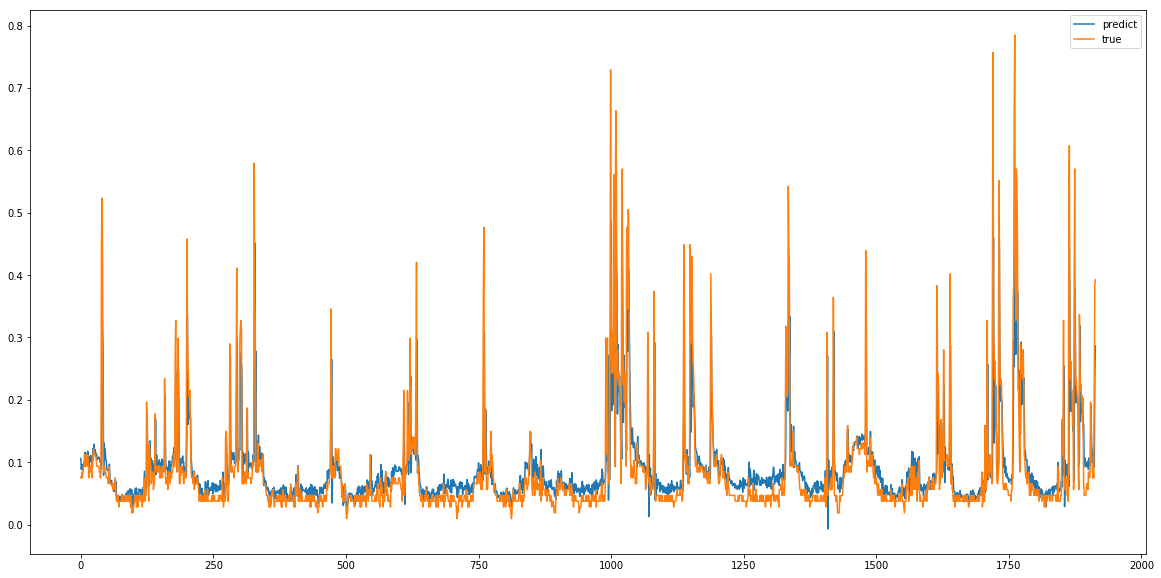

Test RMSE: 0.05780
Test MAE: 0.02994
Test MSE: 0.00334
Test RMSE: 62.80166
Test MAE: 32.52852


In [139]:
##bilstm(150)
from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [141]:
first_input = Input(shape=(60,28))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(in1)
in1=Flatten()(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/appliance_1dcnn.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model


Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 60, 28)]          0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 60, 64)            9024      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 60, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 1921      
Total params: 15,105
Trainable params: 15,105
Non-trainable params: 0
______________________________________________________

In [142]:
model.fit(trainX, trainY,validation_data=[valX,valY],epochs=200, verbose=1,callbacks=[cb])

Train on 15728 samples, validate on 1913 samples
Epoch 1/200
15456/15728 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 00001: val_loss improved from inf to 0.00528, saving model to saved_weights/appliance_1dcnn.hdf5
15728/15728 [==============================] - 2s 99us/sample - loss: 0.0086 - val_loss: 0.0053
Epoch 2/200
15680/15728 [============================>.] - ETA: 0s - loss: 0.0051
Epoch 00002: val_loss improved from 0.00528 to 0.00333, saving model to saved_weights/appliance_1dcnn.hdf5
15728/15728 [==============================] - 1s 81us/sample - loss: 0.0051 - val_loss: 0.0033
Epoch 3/200
15648/15728 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 00003: val_loss did not improve from 0.00333
15728/15728 [==============================] - 1s 80us/sample - loss: 0.0044 - val_loss: 0.0035
Epoch 4/200
15616/15728 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 00004: val_loss did not improve from 0.00333
15728/15728 [==========

KeyboardInterrupt: 

In [143]:
model.load_weights("saved_weights/appliance_1dcnn.hdf5")

In [146]:
testX[:120]

array([[[0.05607476, 0.        , 0.8775079 , ..., 0.6161388 ,
         0.05636808, 0.05636808],
        [0.04672897, 0.        , 0.8669481 , ..., 0.61236805,
         0.9509427 , 0.9509427 ],
        [0.04672897, 0.        , 0.8669481 , ..., 0.6085973 ,
         0.48091778, 0.48091778],
        ...,
        [0.09345795, 0.        , 0.81414986, ..., 0.3846154 ,
         0.8809812 , 0.8809812 ],
        [0.09345795, 0.        , 0.81414986, ..., 0.37330317,
         0.23488425, 0.23488425],
        [0.09345795, 0.        , 0.81414986, ..., 0.36199096,
         0.8057691 , 0.8057691 ]],

       [[0.04672897, 0.        , 0.8669481 , ..., 0.61236805,
         0.9509427 , 0.9509427 ],
        [0.04672897, 0.        , 0.8669481 , ..., 0.6085973 ,
         0.48091778, 0.48091778],
        [0.05607476, 0.        , 0.8669481 , ..., 0.60482657,
         0.46936297, 0.46936297],
        ...,
        [0.09345795, 0.        , 0.81414986, ..., 0.37330317,
         0.23488425, 0.23488425],
        [0.0

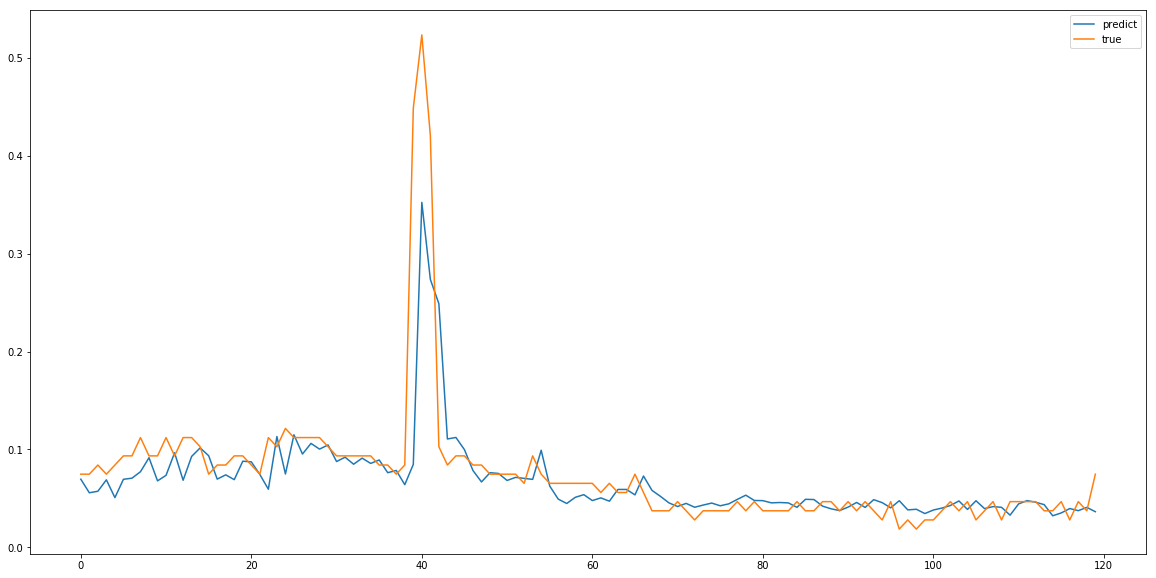

In [147]:
from matplotlib import pyplot
yhat = model.predict([testX[:120]])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY[:120], label='true')
pyplot.legend()
pyplot.show()

In [149]:
##1dcnn

from math import *
rmse = sqrt(mean_squared_error(testY[:120], yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.04408


In [14]:

from tensorflow.keras.models import *

first_input = Input(shape=(None,60,28))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=7, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
#in0=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
out1=Dense(24, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/pm2.5_conv1d_timedistlstm_71.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 60, 28)]    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 54, 64)      12608     
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 54, 64)      4160      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 27, 64)      0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 1728)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                355800    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1224

In [156]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))
#test1X = np.reshape(test1X, (test1X.shape[0],1,test1X.shape[1], test1X.shape[2] ))

In [18]:
trainX.shape
trainY.shape

(15728,)

In [19]:
trainY=np.reshape(trainY,(-1,24))
valY=np.reshape(valY,(-1,24))
testY=np.reshape(testY,(-1,24))

ValueError: cannot reshape array of size 15728 into shape (24)

In [17]:
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

ValueError: A target array with shape (15728, 1) was passed for an output of shape (None, 24) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [734]:
model.load_weights("saved_weights/pm2.5_conv1d_timedist_71.hdf5")

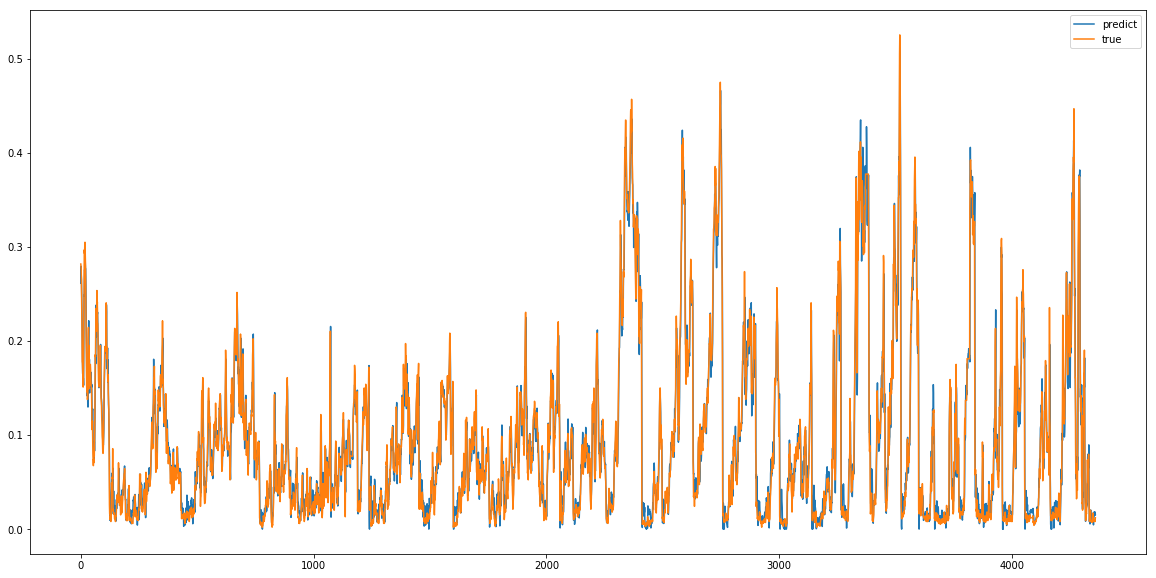

In [735]:
from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [737]:
### timedistribute 1dcnn

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.02032
Test RMSE: 22.06434


In [63]:
trainX.shape

(15776, 1, 12, 28)

In [172]:
first_input = Input(shape=(None,60,28))

in1=TimeDistributed(LSTM(units =150 , return_sequences=True))(first_input)

#in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)
in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
out1=Dense(1, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')




In [173]:
model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, None, 60, 28)]    0         
_________________________________________________________________
time_distributed_107 (TimeDi (None, None, 60, 150)     107400    
_________________________________________________________________
time_distributed_108 (TimeDi (None, None, 58, 64)      28864     
_________________________________________________________________
time_distributed_109 (TimeDi (None, None, 58, 64)      4160      
_________________________________________________________________
time_distributed_110 (TimeDi (None, None, 29, 64)      0         
_________________________________________________________________
time_distributed_111 (TimeDi (None, None, 1856)        0         
_________________________________________________________________
dense_30 (Dense)             (None, None, 1)           185

In [174]:
checkpoint_path = "saved_weights/timedistribute_appliance_lstmcnn_150_5_1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [175]:
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 15728 samples, validate on 1913 samples
Epoch 1/200
15700/15728 [============================>.] - ETA: 0s - loss: 0.0164
Epoch 00001: val_loss improved from inf to 0.01054, saving model to saved_weights/timedistribute_appliance_lstmcnn_150_5_1.hdf5
15728/15728 [==============================] - 10s 607us/sample - loss: 0.0164 - val_loss: 0.0105
Epoch 2/200
15600/15728 [============================>.] - ETA: 0s - loss: 0.0164
Epoch 00002: val_loss did not improve from 0.01054
15728/15728 [==============================] - 8s 522us/sample - loss: 0.0164 - val_loss: 0.0105
Epoch 3/200
15700/15728 [============================>.] - ETA: 0s - loss: 0.0164
Epoch 00003: val_loss did not improve from 0.01054
15728/15728 [==============================] - 8s 523us/sample - loss: 0.0164 - val_loss: 0.0105
Epoch 4/200
  800/15728 [>.............................] - ETA: 7s - loss: 0.0158WARNING:tensorflow:Can save best model only with val_loss available, skipping.


KeyboardInterrupt: 

In [68]:
model.load_weights("saved_weights/timedistribute_appliance_lstmcnn_150_7_1.hdf5")

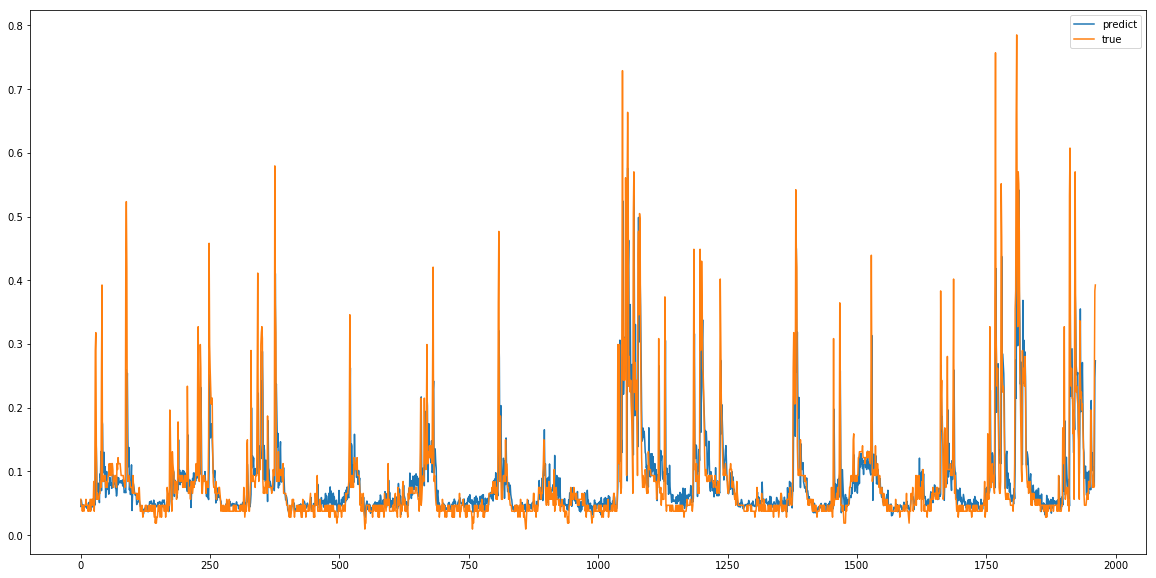

Test RMSE: 0.05773
Test MAE: 0.02773
Test MSE: 0.00333
Test RMSE: 62.72567
Test MAE: 30.13273


In [69]:
## lstm(150)-cnn(3,1),timedistribute_pm2.5_lstmcnn_150_5_11.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae )

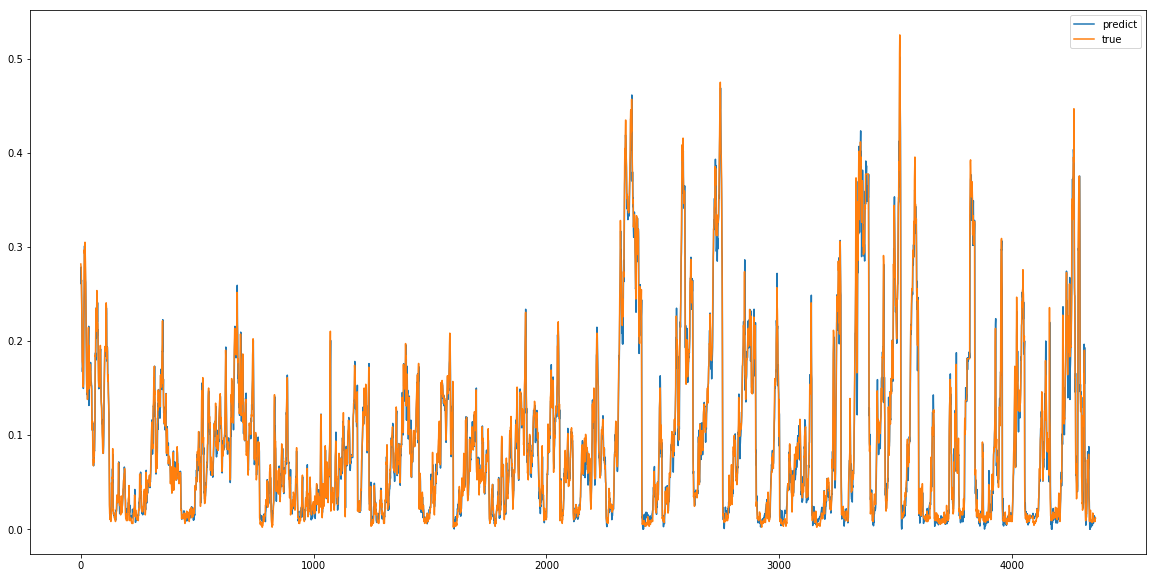

Test RMSE: 0.01806
Test MAE: 0.01101
Test MSE: 0.00033
Test RMSE: 19.61045
Test MAE: 11.95379


In [744]:
## lstm(150)-cnn(5,1),timedistribute_pm2.5_lstmcnn_150_5_11.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae )

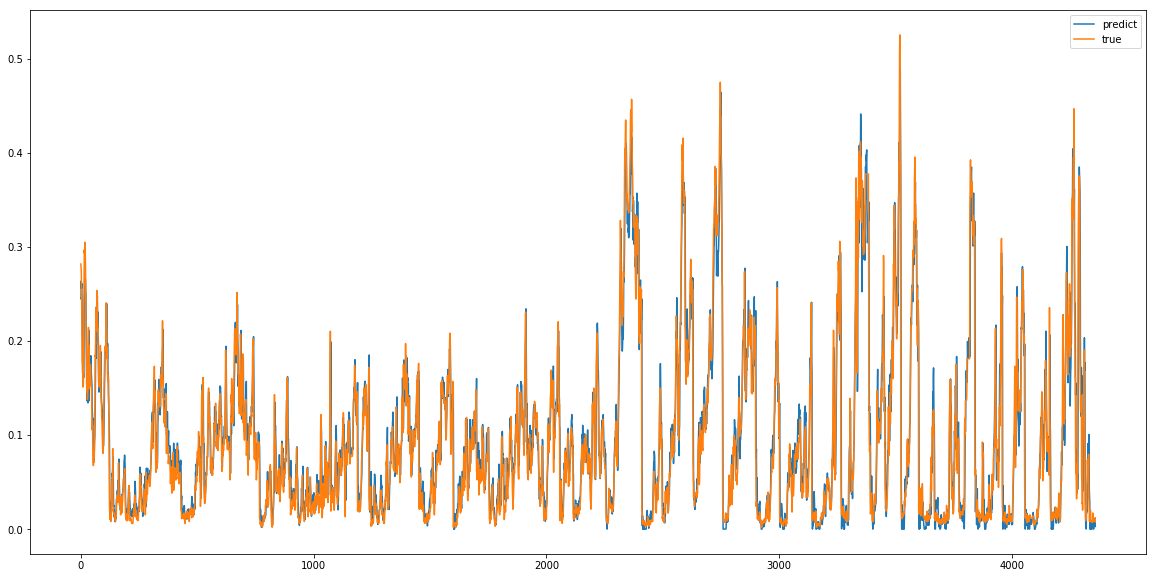

Test RMSE: 0.02786
Test MAE: 0.01743
Test MSE: 0.00078
Test RMSE: 30.25511


In [729]:
## lstm(150)-cnn(2,2.1),timedistribute_pm2.5_lstmcnn_150_5_11.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.5f' % rmse)

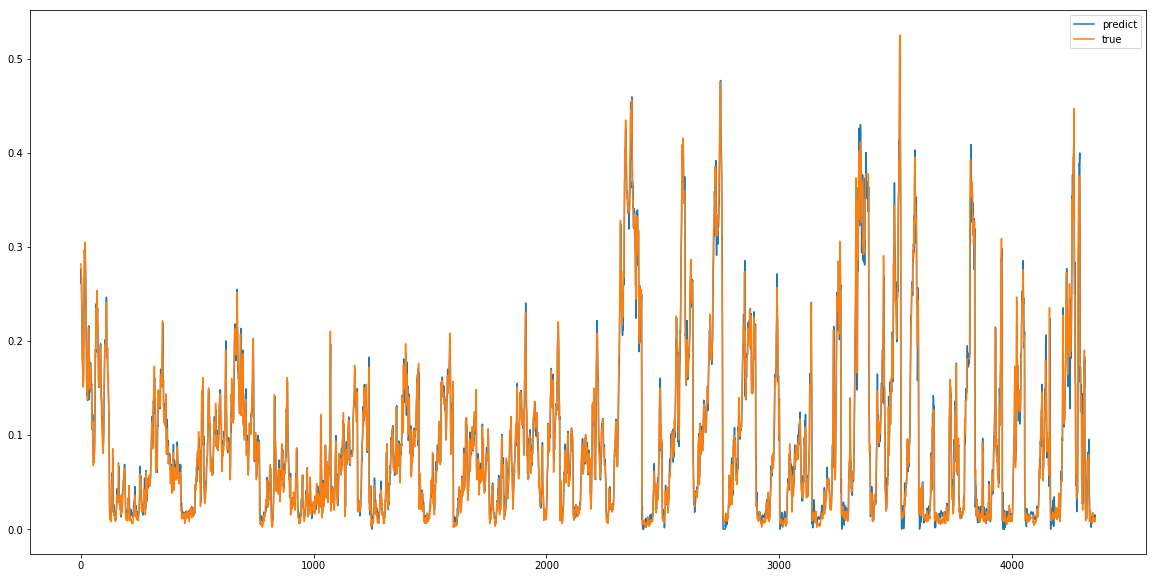

Test RMSE: 0.01818
Test MAE: 0.01115
Test MSE: 0.00033
Test RMSE: 19.740


In [638]:
## lstm(150)-cnn(3,1),timedistribute_pm2.5_lstmcnn_150_5_11.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

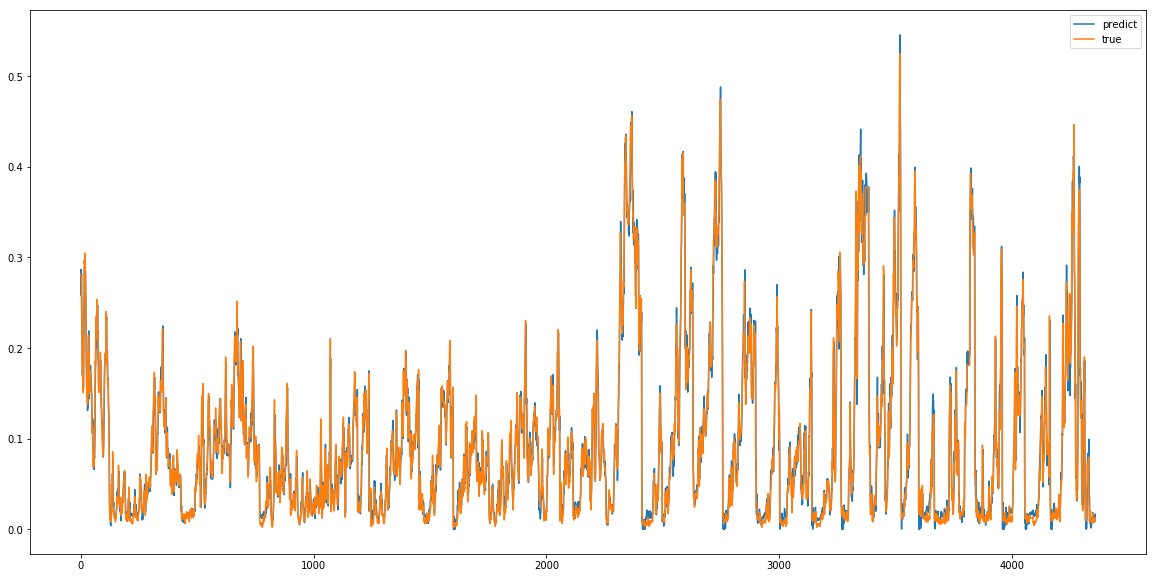

Test RMSE: 0.01849
Test MAE: 0.01152
Test MSE: 0.00034
Test RMSE: 20.077


In [589]:
## lstm(150)-cnn(5,1),timedistribute_pm2.5_lstmcnn_150_5_11.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

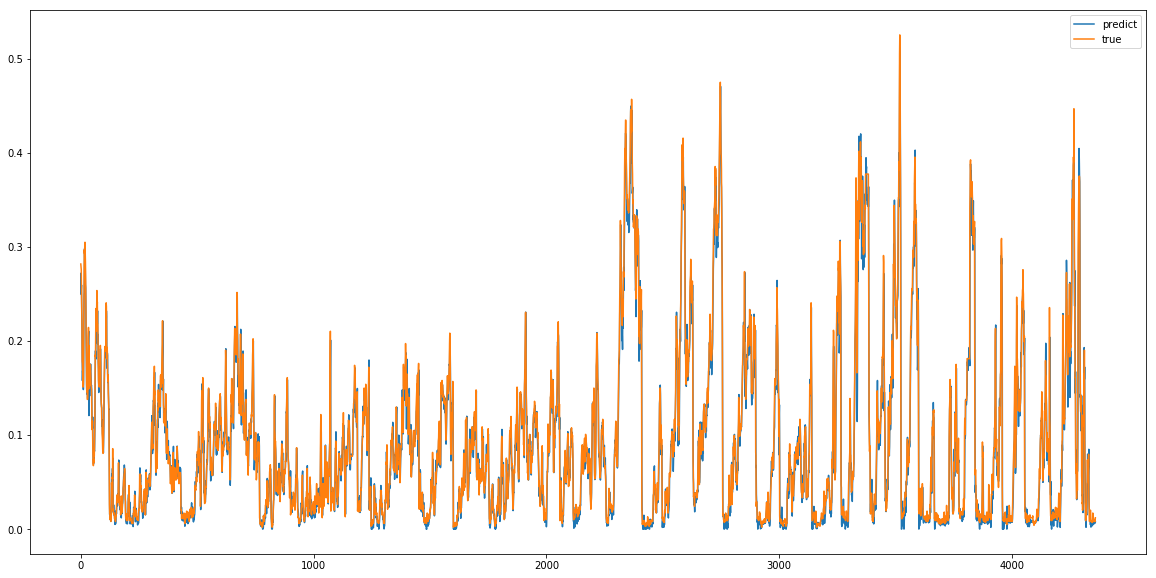

Test RMSE: 0.01820
Test MAE: 0.01122
Test MSE: 0.00033
Test RMSE: 19.764


In [577]:
## lstm(150)-cnn(5,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

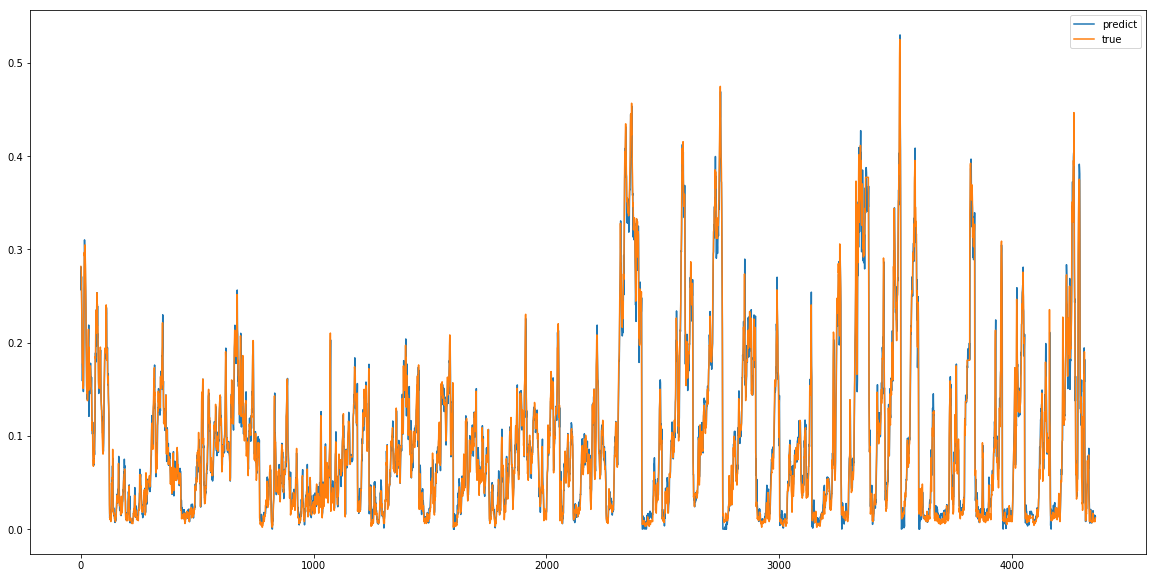

Test RMSE: 0.01831
Test MAE: 0.01130
Test MSE: 0.00034
Test RMSE: 19.885


In [559]:
## lstm(50)-cnn(3,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

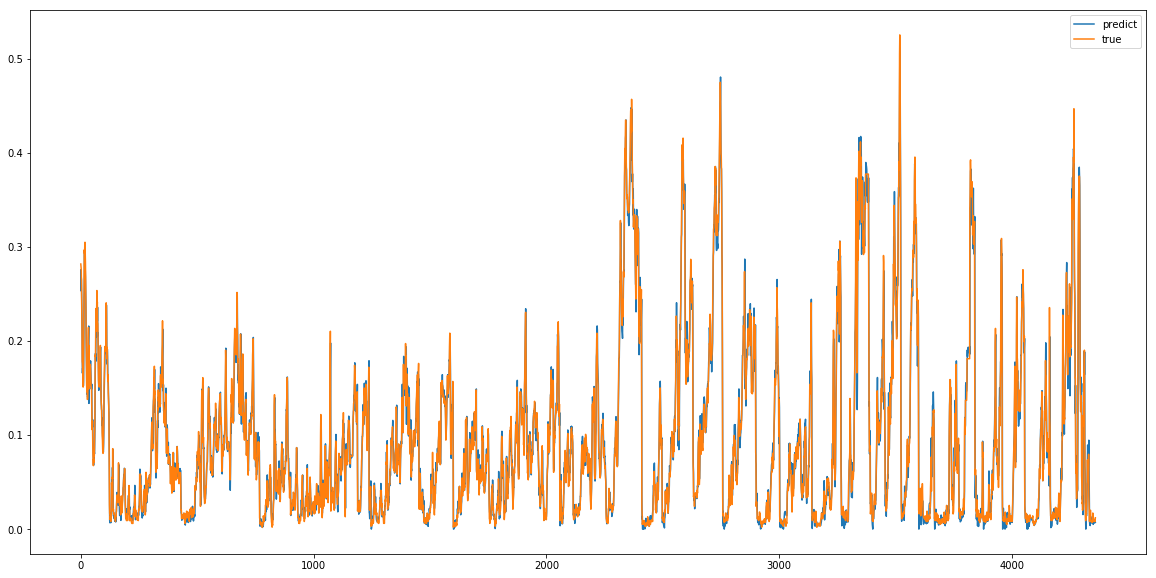

Test RMSE: 0.01770
Test MAE: 0.01071
Test MSE: 0.00031
Test RMSE: 19.21818
Test MAE: 11.63510


In [572]:
## lstm(150)-cnn(3,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


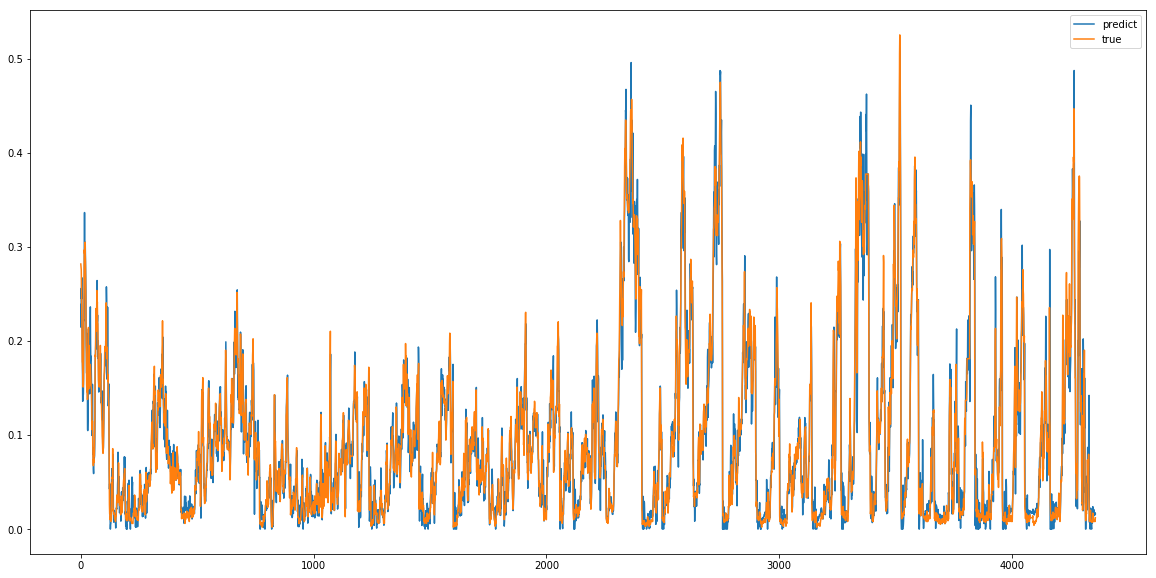

Test RMSE: 0.02343
Test MAE: 0.01534
Test MSE: 0.00055
Test RMSE: 25.447


In [582]:
## lstm(150)-cnn(3,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

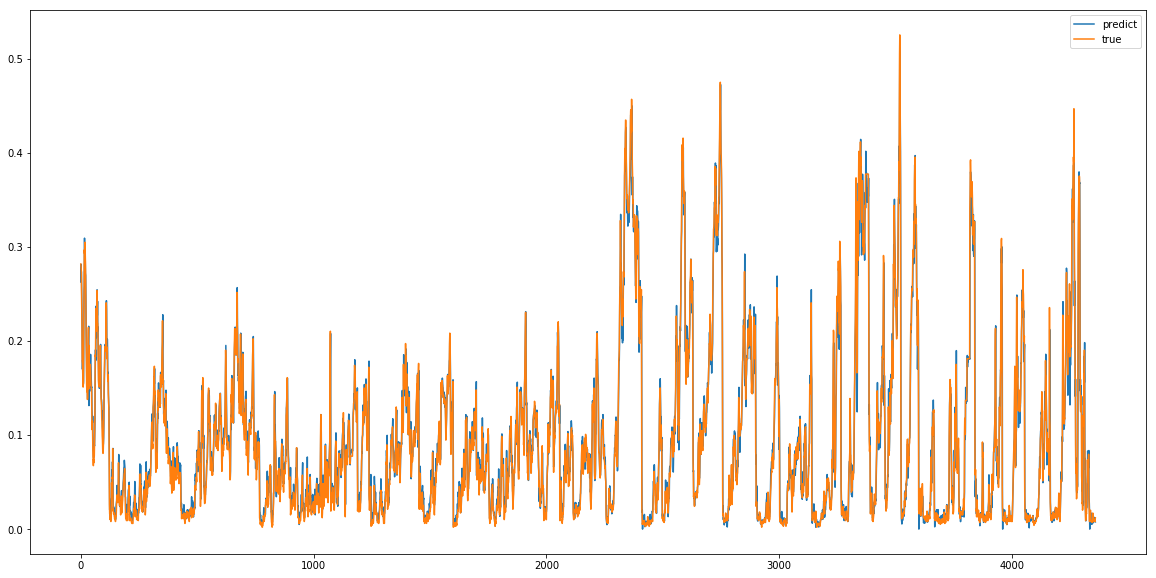

Test RMSE: 0.01783
Test MAE: 0.01091
Test MSE: 0.00032
Test RMSE: 19.36649
Test MAE: 11.85078


In [644]:
## lstm(100)-cnn(3,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)



yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [535]:
yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)

In [536]:
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)

In [537]:
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.218


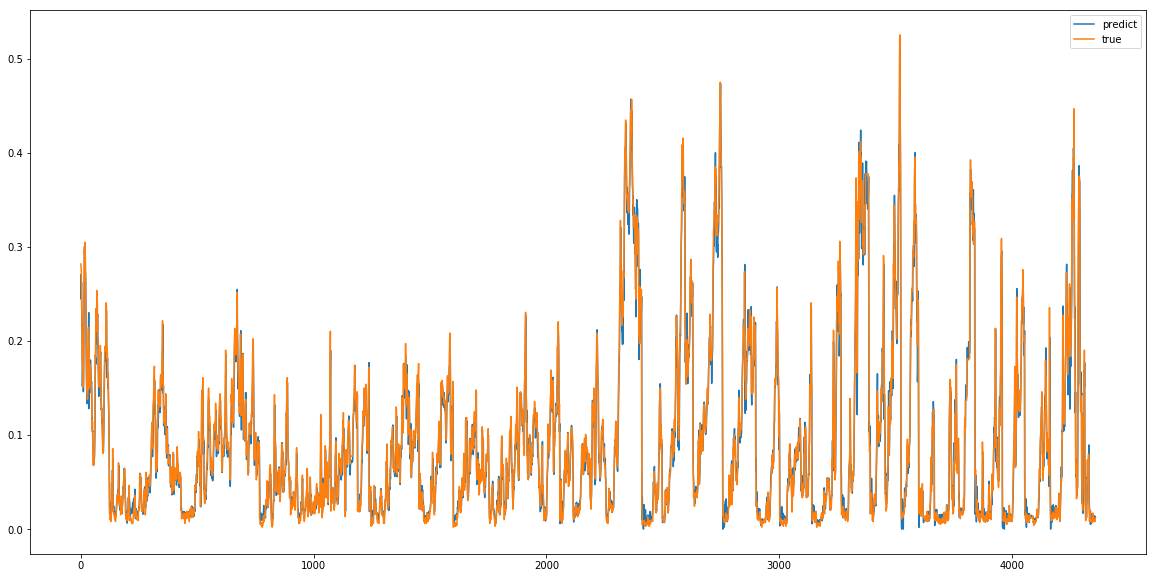

Test RMSE: 0.01796
Test MAE: 0.01116
Test MSE: 0.00032


In [525]:
## lstm(200)-cnn(5,1)

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

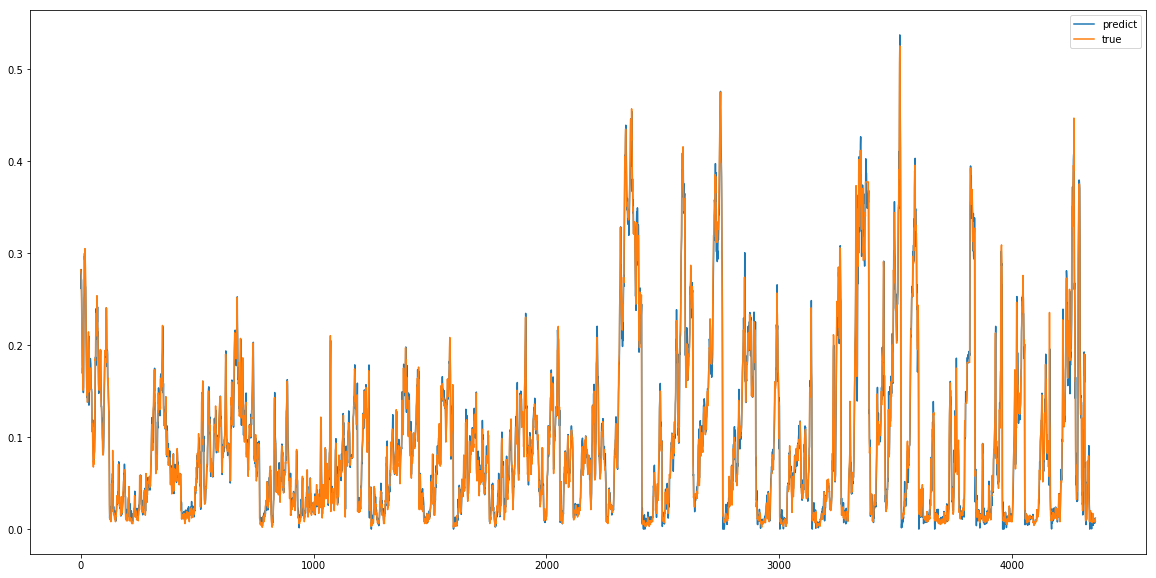

In [475]:
### lstm(100)-1dcnn(5,1), saved_weights/timedistribute_pm2.5_lstmcnn1

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [476]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01795


In [477]:
from math import *
from sklearn.metrics import *

rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

Test RMSE: 0.01795
Test MAE: 0.01083
Test MSE: 0.00032


In [ ]:
### lstm(100)-1dcnn, saved_weights/timedistribute_pm2.5_lstmcnn

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [429]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01799


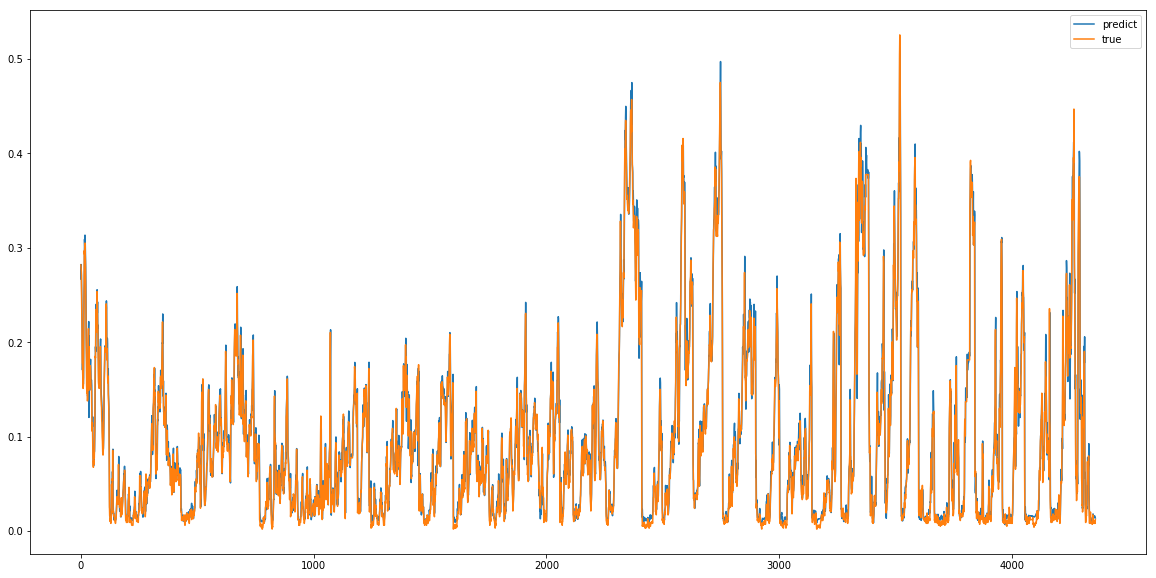

In [403]:
### bilstm(100)-1dcnn

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [400]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01774


In [404]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01812


In [ ]:
### lstm(200)-1dcnn

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

In [420]:
### lstm(100)-1dcnn

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

ValueError: Error when checking input: expected input_74 to have shape (None, 24, 8) but got array with shape (1, 24, 11)

In [ ]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

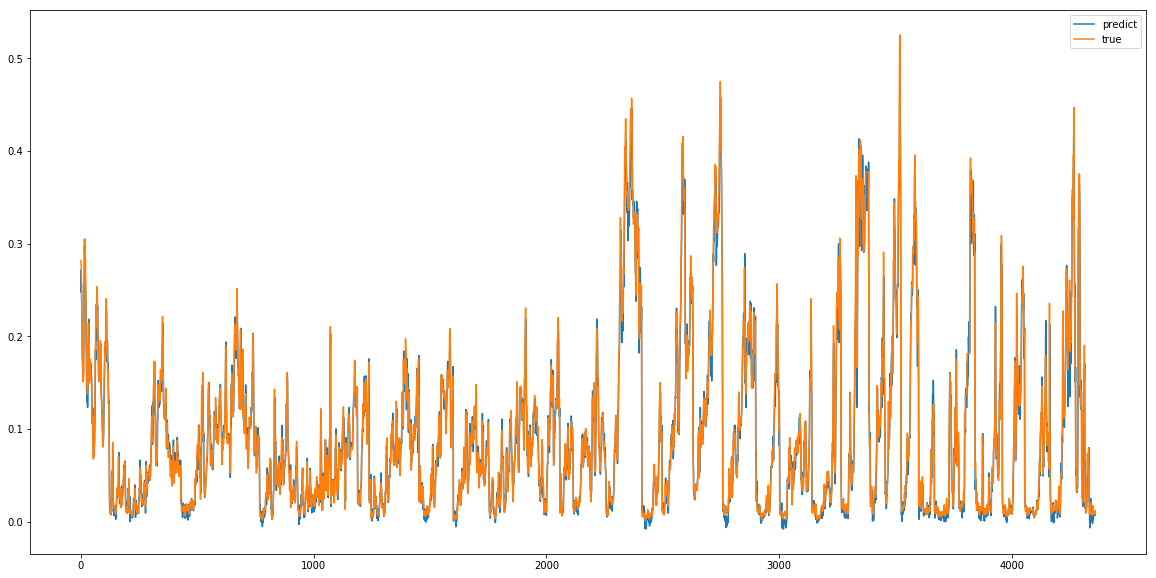

In [30]:
from matplotlib import pyplot
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

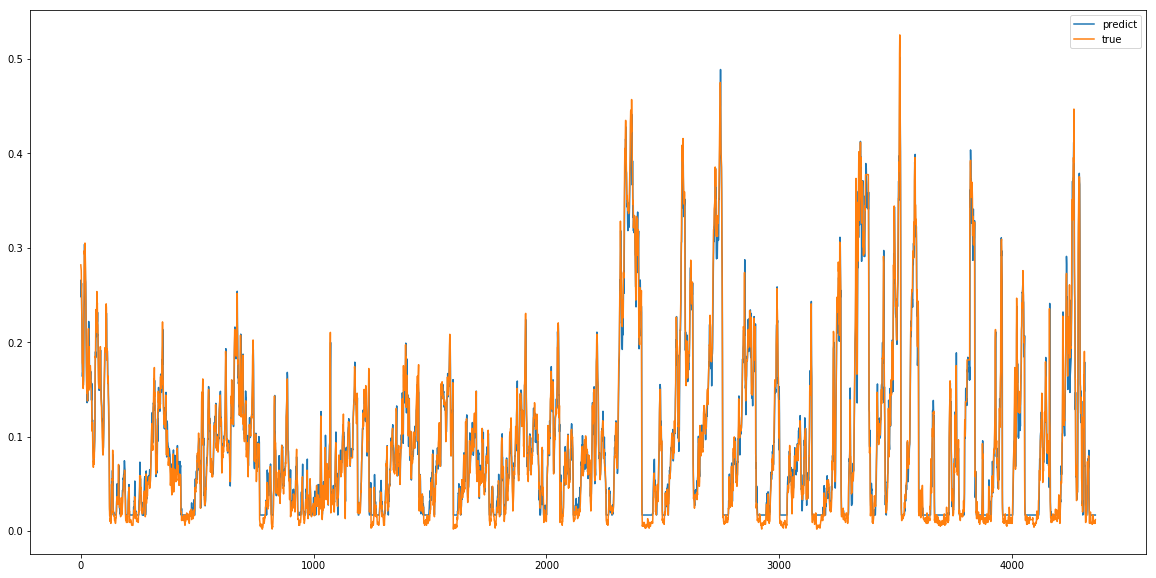

In [34]:
from matplotlib import pyplot
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [526]:
yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)

In [527]:
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)

In [564]:
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.885


### attention cnn, cnn, rescnn 순서

In [14]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01871


In [31]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01857


In [35]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01849


In [338]:
##convlstm

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01964


In [350]:
##convlstm

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01986


In [376]:

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01869


In [86]:
from tensorflow.keras.models import Model


def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

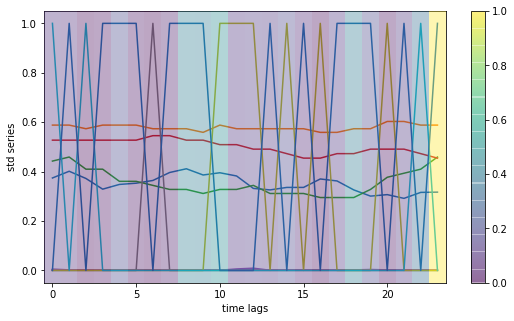

In [107]:
from scipy.ndimage import zoom
import random
id_=random.randint(0,len(testX))


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)

plt.figure(figsize=(9,5))
plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

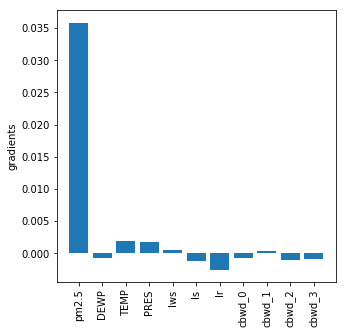

In [106]:
columns=data.columns[5:]

grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(5,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)